In [ ]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
train_data_path = "/content/drive/MyDrive/garbage/train"
validation_data_path = "/content/drive/MyDrive/garbage/test"

In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
 
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(384, 512), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='categorical') 

Found 2187 images belonging to 7 classes.


In [ ]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(384, 512),
                                  batch_size=32,
                                  class_mode='categorical')

Found 564 images belonging to 7 classes.


In [ ]:
# Visualize Images

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

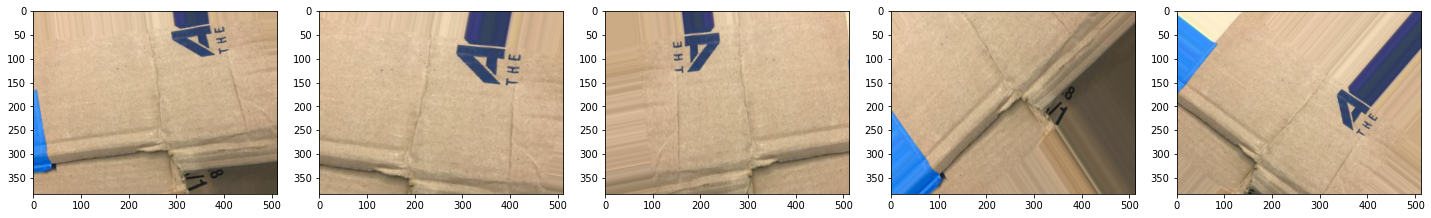

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
model_path = '/content/drive/MyDrive/garbage/cnn-model22.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
#Building cnn model
cnn_model = keras.models.Sequential([
  keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=[384, 512, 3]),
  keras.layers.MaxPooling2D(2, 2),
  keras.layers.Dropout(0.2),
    
  keras.layers.Conv2D(64, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D(2, 2),
  keras.layers.Dropout(0.2),
    
  keras.layers.Conv2D(128, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D(2, 2),
  keras.layers.Dropout(0.2),
    
  keras.layers.Conv2D(256, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D(2, 2),
  keras.layers.Dropout(0.2),
    
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dropout(0.4),
  keras.layers.Dense(7, activation='softmax')
])
 
 
# compile cnn model
cnn_model.compile(optimizer = Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 382, 510, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 191, 255, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 191, 255, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 189, 253, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 94, 126, 64)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 94, 126, 64)       0

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=120, 
                          verbose=1, 
                          validation_data= valid_data)

Epoch 1/120
69/69 [==============================] - 98s 1s/step - loss: 0.1658 - accuracy: 0.7673 - val_loss: 0.2426 - val_accuracy: 0.6578
Epoch 2/120
69/69 [==============================] - 96s 1s/step - loss: 0.1572 - accuracy: 0.7741 - val_loss: 0.2750 - val_accuracy: 0.5975
Epoch 3/120
69/69 [==============================] - 98s 1s/step - loss: 0.1594 - accuracy: 0.7791 - val_loss: 0.2444 - val_accuracy: 0.6578
Epoch 4/120
69/69 [==============================] - 97s 1s/step - loss: 0.1609 - accuracy: 0.7718 - val_loss: 0.2673 - val_accuracy: 0.6028
Epoch 5/120
69/69 [==============================] - 97s 1s/step - loss: 0.1593 - accuracy: 0.7810 - val_loss: 0.2587 - val_accuracy: 0.6259
Epoch 6/120
69/69 [==============================] - 98s 1s/step - loss: 0.1598 - accuracy: 0.7759 - val_loss: 0.2445 - val_accuracy: 0.6489
Epoch 7/120
69/69 [==============================] - 96s 1s/step - loss: 0.1528 - accuracy: 0.7929 - val_loss: 0.2315 - val_accuracy: 0.6773
Epoch 8/120
6

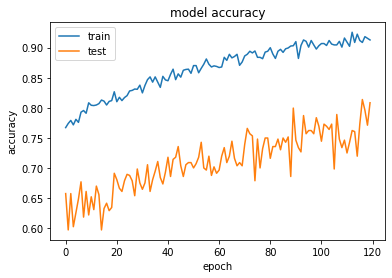

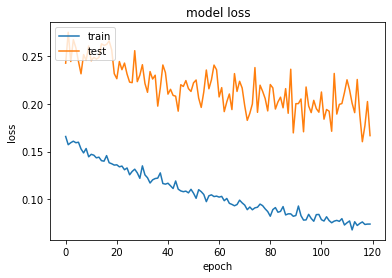

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
cnn_model.evaluate(valid_data)

18/18 [==============================] - 3s 180ms/step - loss: 0.1667 - accuracy: 0.8085


[0.1667492538690567, 0.8085106611251831]

In [ ]:
# Store Trained Model
cnn_model.save("/content/drive/MyDrive/garbage/model99.h5")

In [ ]:
print(valid_data.class_indices)

{'cardboard': 0, 'compost': 1, 'glass': 2, 'metal': 3, 'paper': 4, 'plastic': 5, 'trash': 6}


In [ ]:
import pickle as pk

In [ ]:
# Generate Image LookUps For Images
TrainImageClasses = valid_data.class_indices
table = {}
for imageVal, imageName in zip(TrainImageClasses.values(), TrainImageClasses.keys()):
    table[imageVal] = imageName

#Store table in pickle file
with open("tableValues.pkl", "wb") as fileWriter:
    pk.dump(table, fileWriter)

In [ ]:
##Making single predictions
import numpy as np
from keras.preprocessing import image

ImagePath='/content/drive/MyDrive/garbage/test/cardboard/cardboard28.jpg'
test_image=image.load_img(ImagePath,target_size=(384, 512))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=cnn_model.predict(test_image,verbose=0)
#print(training_set.class_indices)


print('Prediction is: ',table[np.argmax(result)])

Prediction is:  cardboard


In [ ]:
##Making single predictions
import numpy as np
from keras.preprocessing import image

ImagePath='/content/drive/MyDrive/garbage/test/paper/paper133.jpg'
test_image=image.load_img(ImagePath,target_size=(384, 512))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=cnn_model.predict(test_image,verbose=0)
#print(training_set.class_indices)


print('Prediction is: ',table[np.argmax(result)])

Prediction is:  paper


In [ ]:
##Making single predictions
import numpy as np
from keras.preprocessing import image

ImagePath='/content/drive/MyDrive/garbage/test/plastic/plastic118.jpg'
test_image=image.load_img(ImagePath,target_size=(384, 512))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=cnn_model.predict(test_image,verbose=0)
#print(training_set.class_indices)


print('Prediction is: ',table[np.argmax(result)])

Prediction is:  plastic


In [ ]:
y_pred = cnn_model.predict(valid_data)

In [ ]:
y_pred

array([[6.7253399e-04, 2.3123462e-04, 6.9063842e-01, ..., 3.7549033e-03,
        5.5676495e-04, 4.5929048e-02],
       [5.5073303e-12, 2.1842560e-12, 9.9999511e-01, ..., 2.1721715e-07,
        4.0717055e-06, 9.3270110e-08],
       [8.5267586e-01, 4.5037792e-05, 1.4318305e-02, ..., 4.0570553e-02,
        4.2217718e-03, 1.1813431e-03],
       ...,
       [1.6558453e-13, 2.7277004e-17, 4.8260299e-15, ..., 1.0000000e+00,
        1.6890249e-14, 5.8177320e-14],
       [3.1228010e-06, 6.5369172e-06, 3.4600838e-05, ..., 8.1599057e-03,
        3.5994401e-06, 9.8732519e-01],
       [9.9999964e-01, 4.3838523e-11, 4.4573820e-08, ..., 7.7844492e-10,
        1.3270872e-09, 8.9079350e-08]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 2, 0, 6, 1, 4, 0, 6, 2, 0, 5, 1, 6, 3, 0, 5, 4, 3, 0, 3, 0, 4,
       4, 3, 3, 1, 4, 3, 6, 2, 0, 6, 2, 5, 5, 4, 2, 2, 3, 0, 0, 2, 0, 0,
       3, 2, 4, 5, 2, 4, 3, 3, 5, 3, 6, 4, 5, 3, 4, 5, 1, 4, 4, 0, 0, 5,
       0, 2, 4, 6, 2, 4, 2, 0, 3, 2, 4, 5, 6, 0, 2, 4, 2, 3, 1, 4, 2, 2,
       5, 5, 5, 3, 2, 4, 6, 0, 2, 0, 5, 6, 4, 5, 4, 2, 0, 2, 4, 5, 3, 4,
       4, 3, 5, 5, 5, 4, 4, 4, 2, 0, 0, 4, 1, 4, 4, 3, 3, 4, 6, 4, 4, 4,
       1, 2, 4, 0, 3, 2, 4, 5, 2, 4, 3, 2, 2, 4, 0, 1, 3, 2, 4, 4, 0, 5,
       6, 6, 4, 2, 3, 3, 0, 4, 4, 2, 4, 5, 2, 4, 0, 5, 5, 0, 3, 0, 4, 1,
       4, 4, 6, 2, 4, 3, 4, 2, 0, 3, 3, 4, 0, 4, 0, 6, 5, 5, 4, 2, 6, 4,
       3, 0, 6, 0, 4, 4, 3, 5, 0, 3, 2, 3, 3, 4, 6, 4, 0, 5, 3, 0, 0, 4,
       3, 4, 3, 3, 3, 1, 1, 2, 3, 4, 2, 0, 3, 3, 3, 4, 0, 0, 0, 4, 5, 4,
       2, 5, 2, 5, 5, 5, 2, 3, 6, 0, 3, 0, 4, 2, 2, 3, 4, 5, 2, 0, 0, 4,
       1, 4, 5, 5, 3, 3, 4, 4, 4, 3, 6, 3, 3, 4, 1, 3, 2, 1, 3, 5, 0, 2,
       5, 5, 2, 3, 2, 4, 1, 4, 1, 3, 5, 1, 6, 6, 2,

Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

   cardboard       0.15      0.17      0.16        92
     compost       0.03      0.03      0.03        38
       glass       0.15      0.14      0.15        90
       metal       0.21      0.26      0.23        77
       paper       0.20      0.22      0.21       117
     plastic       0.20      0.13      0.16       107
       trash       0.16      0.14      0.15        43

    accuracy                           0.17       564
   macro avg       0.16      0.16      0.15       564
weighted avg       0.17      0.17      0.17       564



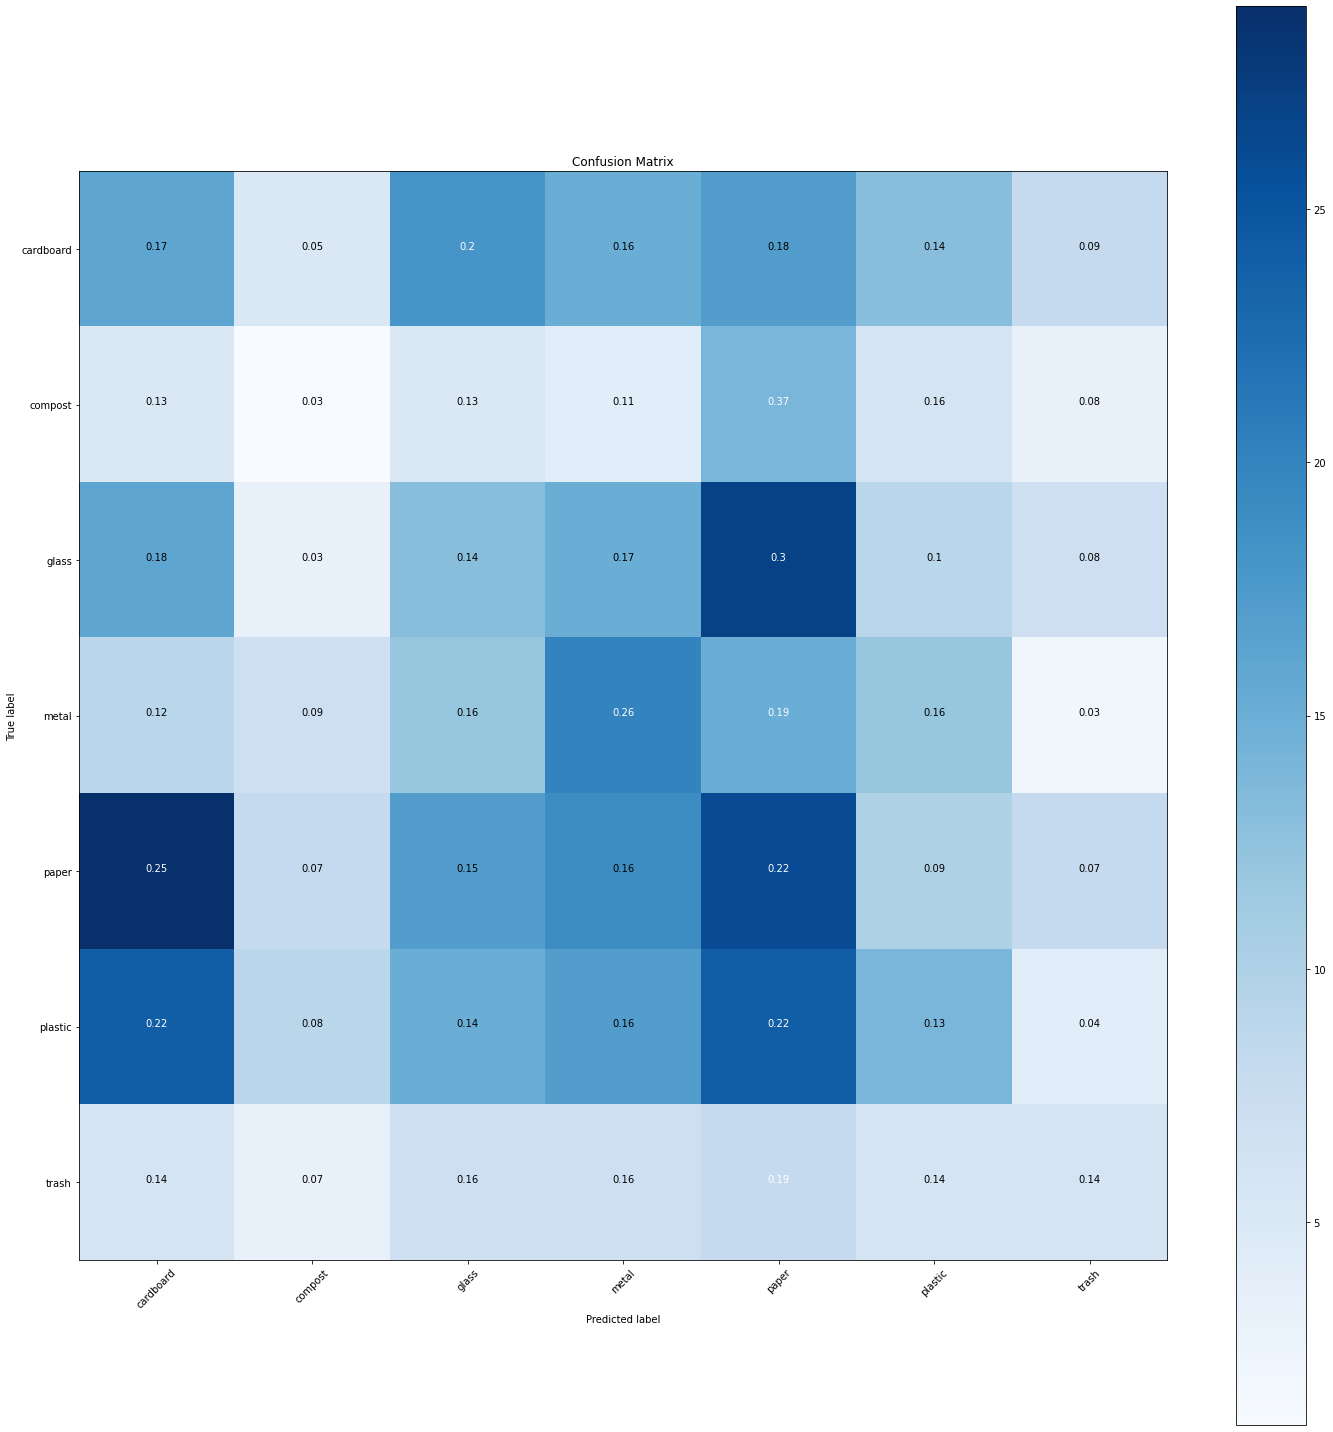

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in training_data.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
#Y_pred = finetune_Mobile_net_model.predict_generator(validation_generator)
#y_pred = np.argmax(y_pred)
print('Confusion Matrix')
cm = confusion_matrix(valid_data.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(valid_data.classes, y_pred, target_names=target_names))